<div>
Olá, Wail!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
    Codigo atualizado de acordo com os comentarios
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v1 </b> <a class="tocSkip"></a>

<s>
Obrigado por enviar o seu projeto e pelo esforço para executar as etapas necessárias.   
<br>
    
No geral, o seu projeto está bom, você implementou corretamente a maioria das questões. Entretanto, deixei um comentário em um trecho que precisamos de um pequeno ajuste para avançarmos.
    
<br>
    
Se tiver alguma dúvida, pode contar comigo.
    
<br>   

**Até breve!**
</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# Book Market Trends and Consumer Behavior in the Post-COVID Era

The coronavirus took the whole world by surprise, changing people's routines. City dwellers no longer spent their free time away from home, going to cafes and shopping malls; Most stayed at home reading books. This caught the attention of startups that rushed to develop new apps for book lovers.

You have received a database from one of the competing services in that market. It contains data on books, publishers, authors, and customer ratings and book reviews. This information will be used to generate a valid proposition for the new product.

Description of the data

- Books: Contains data about books:

book_id — book identifier

author_id — Author identifier

title — Title

num_pages — number of pages

publication_date — date of publication

publisher_id — Publisher identifier

- authors: Contains data about the authors:

author_id — Author identifier

author — Author

- publishers: Contains data on publishers:

publisher_id — Publisher identifier

publisher — Publisher

- Ratings: Contains data on user rating:

rating_id — classification identifier

book_id — book identifier

username — the name of the user who reviewed the book

rating — Classification

- Reviews: Contains data on customer reviews:

review_id — review identifier

book_id — book identifier

username — the name of the user who reviewed the book

text — the text of the revision

The objective of the analysis is to help in providing valuable insights into current book market dynamics, reader preferences, and publisher performance, enabling better decision-making for a new product in the book industry.

## Data Exploration

### Connect to the database 

In [5]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

In [6]:
# Connecting to database
db_config = {
    'user': 'practicum_student', # username
    'pwd': 'QnmDH8Sc2TQLvy2G3Vvh7', # password
    'host': 'yp-trainers-practicum.cluster-czs0gxyx2d8w.us-east-1.rds.amazonaws.com',
    'port': 5432, # connection port
    'db': 'data-analyst-final-project-db' # the name of the database
}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], db_config ['pwd'],
                                                         db_config['host'], db_config['port'],
                                                         db_config['db'])

In [7]:
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- [x] Correto. A estudante configurou corretamente a conexão com o banco de dados. Lembrando que as credenciais de um banco de dados não devem ser compartilhadas em notebooks ou códigos publicados na internet em um projeto real. Como sugestão, aqui você poderia separar os comandos acima em células diferentes para isolar a execução do código.
- [x] A estudante explorou corretamente as tabelas do banco de dados
- **Dica:** considere executar os comandos acima em células separadas para isolar a execução do código
</div>

### Load Data

In [8]:
# Define SQL queries for each table
query1 = 'SELECT * FROM books;'
query2 = 'SELECT * FROM authors;'
query3 = 'SELECT * FROM publishers;'
query4 = 'SELECT * FROM ratings;'
query5 = 'SELECT * FROM reviews;'


# Execute the queries and store in the dataframes
books = pd.read_sql(query1, con=engine)
authors = pd.read_sql(query2, con=engine)
publishers = pd.read_sql(query3, con=engine)
ratings = pd.read_sql(query4, con=engine)
reviews = pd.read_sql(query5, con=engine)

# Print the first few rows of each table
print(books.head(), "\n")
print(authors.head(), "\n")
print(publishers.head(), "\n")
print(ratings.head(), "\n")
print(reviews.head(), "\n")

   book_id  author_id                                              title  \
0        1        546                                       'Salem's Lot   
1        2        465                 1 000 Places to See Before You Die   
2        3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3        4         82  1491: New Revelations of the Americas Before C...   
4        5        125                                               1776   

   num_pages publication_date  publisher_id  
0        594       2005-11-01            93  
1        992       2003-05-22           336  
2        322       2010-12-21           135  
3        541       2006-10-10           309  
4        386       2006-07-04           268   

   author_id                          author
0          1                      A.S. Byatt
1          2  Aesop/Laura Harris/Laura Gibbs
2          3                 Agatha Christie
3          4                   Alan Brennert
4          5        Alan Moore/David   L

### Check for data types

In [9]:
# Check data types
print("\nData Types for Books:\n", books.dtypes)
print("\nData Types for Authors:\n", authors.dtypes)
print("\nData Types for Publishers:\n", publishers.dtypes)
print("\nData Types for Ratings:\n", ratings.dtypes)
print("\nData Types for Reviews:\n", reviews.dtypes)


Data Types for Books:
 book_id              int64
author_id            int64
title               object
num_pages            int64
publication_date    object
publisher_id         int64
dtype: object

Data Types for Authors:
 author_id     int64
author       object
dtype: object

Data Types for Publishers:
 publisher_id     int64
publisher       object
dtype: object

Data Types for Ratings:
 rating_id     int64
book_id       int64
username     object
rating        int64
dtype: object

Data Types for Reviews:
 review_id     int64
book_id       int64
username     object
text         object
dtype: object


In [10]:
# Convert necessary columns to datetime
books['publication_date'] = pd.to_datetime(books['publication_date'])
books.dtypes

book_id                      int64
author_id                    int64
title                       object
num_pages                    int64
publication_date    datetime64[ns]
publisher_id                 int64
dtype: object

### Check for missing values

In [11]:
# Check missing values
books.info()
authors.info()
publishers.info()
ratings.info()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   book_id           1000 non-null   int64         
 1   author_id         1000 non-null   int64         
 2   title             1000 non-null   object        
 3   num_pages         1000 non-null   int64         
 4   publication_date  1000 non-null   datetime64[ns]
 5   publisher_id      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 47.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data colum

After analysis no missing values were found

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- As tabelas foram exploradas
- Os dados ausentes e duplicados foram estudados
</div>

## Perform Exploratory Data Analysis (EDA)

### Find the number of books released after January 1, 2000.

In [12]:
query_total_books= """
SELECT COUNT(*) AS num_total_books 
FROM books;
"""
query_books_after_2000 = """
SELECT COUNT(*) AS num_books_after_2000
FROM books 
WHERE publication_date > '2000-01-01';
"""
num_total_books = pd.read_sql(query_total_books, con=engine)
num_books_after_2000 = pd.read_sql(query_books_after_2000, con=engine)
print(num_total_books)
print(num_books_after_2000)

   num_total_books
0             1000
   num_books_after_2000
0                   819


A significant majority (approximately 81.9%) of the books published after January 1, 2000, have more than 50 pages, indicating that longer works are prevalent in the market.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A quantidade de livros lançadas após Jan-2000 foi calculada
</div>

### Find the number of reviews and the average rating for each book.

In [19]:
query_reviews_avg_rating = """
SELECT 
    b.book_id,
    b.title,
    COUNT(rv.review_id) AS num_reviews,
    AVG(r.rating) AS avg_rating
FROM 
    books b
LEFT JOIN 
    reviews rv ON b.book_id = rv.book_id
LEFT JOIN 
    ratings r ON b.book_id = r.book_id
GROUP BY 
    b.book_id, b.title
ORDER BY avg_rating DESC;
"""

# Will merge books and reviews table by book.id then merge this merged table wtih ratings by book.id
# Then find the number of reviews and the average rating for each book

# Execute the query and store the result in a DataFrame
reviews_avg_rating_df = pd.read_sql(query_reviews_avg_rating, con=engine)

# Display the first few rows of the DataFrame
print(reviews_avg_rating_df.head())

print('\nBooks with average rating > 3:\n', reviews_avg_rating_df.query('avg_rating > 3')['book_id'])
print('\nBooks with more than 10 reviews:\n', reviews_avg_rating_df.query('num_reviews > 10')['book_id'])

   book_id                                              title  num_reviews  \
0      518               Pop Goes the Weasel (Alex Cross  #5)            4   
1      732  The Ghost Map: The Story of London's Most Terr...            4   
2      347  In the Hand of the Goddess (Song of the Liones...            6   
3      610                           Tai-Pan (Asian Saga  #2)            4   
4      330  How to Be a Domestic Goddess: Baking and the A...            2   

   avg_rating  
0         5.0  
1         5.0  
2         5.0  
3         5.0  
4         5.0  

Books with average rating > 3:
 0      518
1      732
2      347
3      610
4      330
      ... 
893    189
894     10
895    353
896    291
897    693
Name: book_id, Length: 898, dtype: int64

Books with more than 10 reviews:
 7      553
13      17
44     195
45     524
46     801
      ... 
954    443
961    921
965    200
967    557
995    915
Name: book_id, Length: 386, dtype: int64


A smaller group of books (386) receives substantial engagement through reviews, which could indicate the presence of a few bestsellers or highly popular titles.

Although only a subset of books has significant engagement, most books (898) receive positive ratings, showing that the platform maintains a reasonably high-quality collection.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O número de avaliações e média foram calculados para cada livro
- **Sugestão:** considere ordenar o resultado final em ordem descendente da nota média de avaliações.

</div>

### Identify the publisher that has released the most books over 50 pages (this will help you exclude paperbacks and similar publications from your analysis).

In [25]:
query_top_publisher = """
SELECT 
    p.publisher_id, 
    p.publisher, 
    COUNT(b.book_id) AS num_books_over_50_pages
FROM 
    books b
LEFT JOIN 
    publishers p ON b.publisher_id = p.publisher_id
WHERE 
    b.num_pages > 50
GROUP BY 
    p.publisher_id, p.publisher
ORDER BY 
    num_books_over_50_pages DESC;
"""

# Will select publisher_id and number of books with over 50 pages
# Sort number of books in descending way

top_publisher = pd.read_sql(query_top_publisher, con=engine)
print(top_publisher)

     publisher_id                     publisher  num_books_over_50_pages
0             212                 Penguin Books                       42
1             309                       Vintage                       31
2             116      Grand Central Publishing                       25
3             217              Penguin Classics                       24
4              33              Ballantine Books                       19
..            ...                           ...                      ...
329            34         Ballantine Books (NY)                        1
330           225                 Plaza y Janés                        1
331           138       HarperCollinsPublishers                        1
332           245  Random House: Modern Library                        1
333           205                 Pan Childrens                        1

[334 rows x 3 columns]


Publisher with publisher_id = 212 has released the highest number of books with over 50 pages (42 books).

The top publishers (e.g., publisher IDs 212, 309, and 116) have released significantly more books than others. The gap between the top publisher (42 books) and lower-ranked publishers indicates that book production is concentrated among a small number of publishers.

Many publishers (e.g., IDs 34, 225, 138, etc.) have only released one book over 50 pages. This suggests that most publishers in the dataset produce a limited number of long-form books, likely focusing on other types of publications such as paperbacks or specialized editions.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
- Aqui você precisa exibir o nome da editora também. O resultado esperado é mostrado abaixo:
    
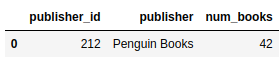
</s>
</div>

### Identify the author with the highest average book rating: only look at books with at least 50 ratings.

In [26]:
query_top_avg_rating_author = '''
SELECT 
    a.author_id, 
    a.author, 
    AVG(r.rating) AS avg_author_rating,
    COUNT(r.rating_id) AS num_ratings

FROM books b
JOIN ratings r ON b.book_id = r.book_id
JOIN authors a ON b.author_id = a.author_id
GROUP BY a.author_id, a.author
HAVING COUNT(r.rating_id) >= 50
ORDER BY avg_author_rating DESC
LIMIT 1;

'''

# Will merge books, ratings table by book.id then merge this merged table wtih authors by author.id
# Then will select only the authors that recived more than 50 ratings
# Then find the average rating and number of ratings received by the authors

top_avg_rating_author = pd.read_sql(query_top_avg_rating_author, con=engine)
print(top_avg_rating_author)

   author_id          author  avg_author_rating  num_ratings
0        130  Diana Gabaldon                4.3           50


Diana Gabaldon leads the list with an average rating of 4.30, followed closely by J.K. Rowling (with Mary GrandPré) at 4.29 and Agatha Christie at 4.28.

J.K. Rowling/Mary GrandPré not only has a high average rating but also stands out with 312 ratings, indicating both popularity and consistent positive feedback.

Authors like J.K. Rowling and J.R.R. Tolkien exhibit both a high number of ratings and strong average scores, demonstrating a combination of popularity and consistent reader satisfaction.

The top authors come from a variety of genres—Diana Gabaldon (historical fiction), J.K. Rowling (fantasy), Agatha Christie (mystery), and J.R.R. Tolkien (epic fantasy). This diversity suggests that high-quality writing and storytelling transcend genres.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>
- Aqui você precisa exibir somente o nome do autor com maior média, similar à questão anterior. Sugestão: faça um join entre as tabelas e selecione as colunas necessários.
    
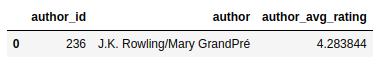
</s>
</div>

### Find the average number of reviews among users who have rated more than 50 books.

In [38]:
query_avg_reviews_per_user = '''
SELECT 
    AVG(review_count) AS avg_reviews_per_user
FROM (
    SELECT 
        username, 
        COUNT(review_id) AS review_count
    FROM reviews
    WHERE username IN 
    (
        SELECT 
            username
        FROM ratings
        GROUP BY username
        HAVING COUNT(rating_id) > 50
    )
    GROUP BY username
) AS user_review_counts;

'''
# 'Where' is used to filter username that rated more than 50 books
# Then will select the number of reviews for each of these users
# Then find the average number of reviews among users

avg_reviews_per_user = pd.read_sql(query_avg_reviews_per_user, con=engine)
print(avg_reviews_per_user)

   avg_reviews_per_user
0             24.333333


The average number of reviews among users who have rated more than 50 books is approximately 24.33.

Users who are highly active in rating books (more than 50 ratings) also tend to engage significantly with the review process. An average of about 24 reviews suggests that these users take the time to provide feedback on the books they read, indicating a deeper level of engagement with the material.

This average number of reviews could indicate that users who rate many books tend to express their opinions more thoroughly. This could be beneficial for publishers and authors, as they can leverage this feedback for improving book quality and targeting their audience better.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O número médio de reviews para usuários que avaliaram mais de 50 livros foi executada
- A conclusão foi apresentada
</div>

## Conclusions for a new product in the book industry.

Based on the analysis results it can be concluded that:

A new product could emphasize the development and promotion of full-length novels, potentially appealing to avid readers seeking immersive experiences.

Target the 386 books with substantial engagement through reviews for exclusive editions or marketing campaigns, as these likely represent popular titles.

The existence of 898 positively rated books suggests a solid quality foundation. Curated lists and recommendations can enhance user experience and trust.

Partner with leading publishers like ID 212 to create exclusive releases and promotions, leveraging their strong market presence.

Many publishers have only released one long-form book. Offering platforms for independent publishers can diversify offerings and enrich the catalog.

Promote authors with high ratings, such as Diana Gabaldon and J.K. Rowling, through marketing efforts and exclusive events to attract their fan bases.

The average of 24.33 reviews among users who rate over 50 books indicates a dedicated community. Develop a platform for user interaction and incentivize feedback to strengthen engagement.

Use reviews and ratings to guide product improvements and enhance customer satisfaction, ensuring that user suggestions are valued and acted upon.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>- Excelente conclusão geral. Peço somente que atualize os resultados após os ajustes sugeridos.</s>
</div>